# A2 - Introdução à Ciência de Dados
## Análise Exploratória de Dados em Python

>#### Grupo:
>Amanda de Mendonça Perez - 211708002
>
>Douglas Arthur Almeida Hancock - 211708039
>
>Luigi Von Blücher Mezzogori - 202708901
>
>Pablo Julliano Gomes Fontenelle - 211708025

Analisando as características dos livros mais populares:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

livros = pd.read_csv('./Dados/GoodReads_100k_books.csv', encoding='utf-8')

In [2]:
lista_colunas = ['title', 'author', 'bookformat', 'genre', 'pages', 'rating', 'reviews', 'totalratings']

livros = livros[lista_colunas]
livros.head()

,title,author,bookformat,genre,pages,rating,reviews,totalratings
0,Between Two Fires: American Indians in the Civ...,Laurence M. Hauptman,Hardcover,"History,Military History,Civil War,American Hi...",0,3.52,5,33
1,Fashion Sourcebook 1920s,"Charlotte Fiell,Emmanuelle Dirix",Paperback,"Couture,Fashion,Historical,Art,Nonfiction",576,4.51,6,41
2,Hungary 56,Andy Anderson,Paperback,"Politics,History",124,4.15,2,26
3,All-American Anarchist: Joseph A. Labadie and ...,Carlotta R. Anderson,Hardcover,"Labor,History",324,3.83,1,6
4,Les oiseaux gourmands,Jean Leveille,NaN,NaN,177,4.00,1,1


Ordenando os livros com base em seu `totalratings` (isto é, na quantidade total de avaliações publicadas) e visualizando as primeiras linhas da tabela, podemos perceber que utilizar essa coluna como forma de mensurar a popularidade de um livro pode ser uma boa ideia, uma vez que os títulos com maior quantidade de avaliações são amplamente conhecidos.

In [5]:
livros.sort_values(by="totalratings", ascending=False).head()

,title,author,bookformat,genre,pages,rating,reviews,totalratings
27180,The Fault in Our Stars,John Green,Hardcover,"Young Adult,Romance,Fiction,Contemporary,Reali...",313,4.19,158776,3819326
49695,Divergent,Veronica Roth,Paperback,"Young Adult,Science Fiction,Dystopia,Fiction,F...",487,4.18,110042,3099689
57742,Harry Potter and the Deathly Hallows,J.K. Rowling,Hardcover,"Fantasy,Young Adult,Fiction,Fantasy,Magic,Chil...",759,4.62,68974,2984351
94942,Animal Farm,"George Orwell,Russell Baker,C.M. Woodhouse",Mass Market Paperback,"Classics,Fiction,Science Fiction,Dystopia,Fant...",141,3.96,61970,2938072
81236,Harry Potter and the Chamber of Secrets,"J.K. Rowling,Mary GrandPrÃ©",Hardcover,"Fantasy,Young Adult,Fiction,Fantasy,Magic,Chil...",341,4.43,57146,2934616


Buscando entender suas principais características:

Text(-2.6999999999999957, 0.5, 'Quantidade de páginas')

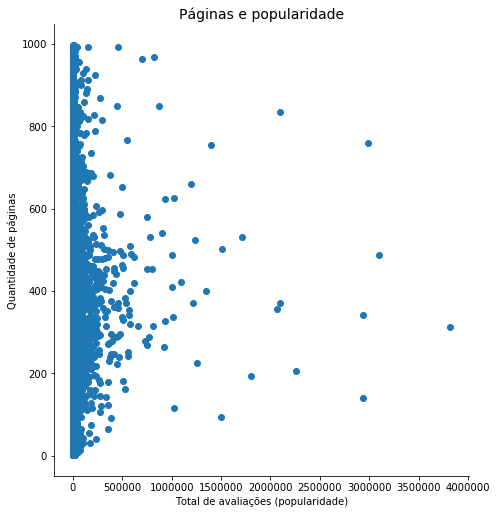

In [18]:
livros2 = livros[livros['pages'] <1000] #filtrando os valores extremos 
livros2 = livros2[livros2['pages'] != 0] # filtrando valores nulos
sns.FacetGrid(livros2, height=7).map(plt.scatter, "totalratings", "pages")
plt.title ("Páginas e popularidade", fontsize=14)
plt.xlabel ("Total de avaliações (popularidade)")
plt.ylabel ("Quantidade de páginas")

Text(-9.074999999999996, 0.5, 'Quantidade de páginas')

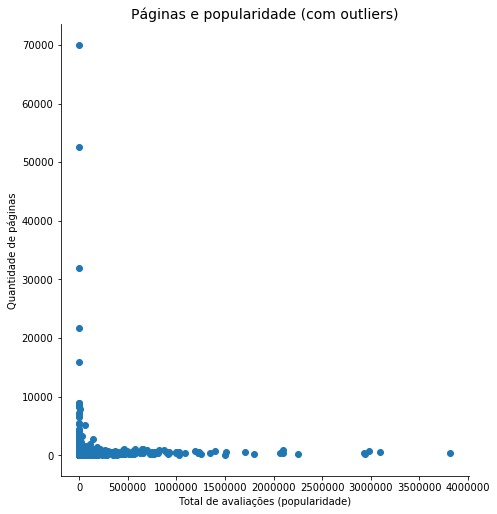

In [19]:
sns.FacetGrid(livros, height=7).map(plt.scatter, "totalratings", "pages")
plt.title ("Páginas e popularidade (com outliers)", fontsize=14)
plt.xlabel ("Total de avaliações (popularidade)")
plt.ylabel ("Quantidade de páginas")

Parece não haver tanta relação entre a quantidade de páginas e a popularidade de um livro, exceto que livros com quantidades exepcionalmente grandes de páginas não costumam ter muita popularidade. É possível que esses outliers sejam, na realidade, erros de digitação ou algum outro problema na coleta dos dados.